In [24]:
using JLD
using DSP: conv # For conv function in Psi
using Dates
using Random

using PyPlot

kse = include("Model_KSE.jl")

Main.Model_KSE

In [25]:
gen = "linn"     # this is just a reference designation it shows up in the
                # output file. I think of generatrion.

T        = 150+10^3 # Length (in seconds) of time of run
T_disc   = 10^3    # Length (in seconds) of time discarded
P        = 2π/sqrt(0.085)  # Period
N        = 96  # Number of fourier modes used
h        = 1e-3 # Timestep
g        = x -> cos(π*x/16)*(1 + sin.(π*x/16))
obs_gap  = 100
seed     = 2020

Δt = h*obs_gap

0.1

In [ ]:
Random.seed!(seed)
uu, vv, tt =  @time kse.my_KSE_solver(T; T_disc, P, N, h, g, n_gap = obs_gap)

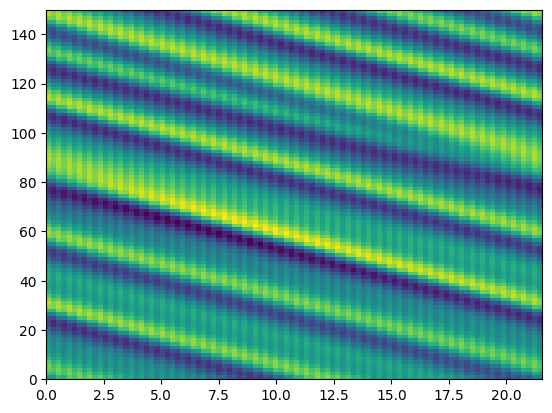

PyObject <matplotlib.image.AxesImage object at 0x7fd754868f40>

In [23]:
t_start = 0
t_stop = 10
ind_start = floor(Int,t_start/Δt)+1
ind_stop =floor(Int,t_stop/Δt)

H1 = imshow(uu[:,ind_start:ind_stop]', extent=[0,21.55,0,150], aspect="auto")

In [10]:
ind_start

1

In [11]:
ind_stop

100

In [15]:
uu

96×0 Array{Float64,2}

In [ ]:
paramaters = Dict(
   "gen" => gen,
    "T" => T,
   "T_disc" => T_disc,
   "P" => P,
   "N" => N,
   "h" => h,
   "g" => "x -> cos(π*x/16)*(1 + sin.(π*x/16))",
   "obs_gap" => obs_gap,
   "seed" => seed,
   "tm" => now()
   )

server = startswith(pwd(), "/u5/jaredm") ? true : false
println("on server = $server")
sol_file = server ? "../../../data/KSE_Data/KSE_sol_$gen.jld" :
   "Examples/KSE/Data/KSE_sol_$gen.jld"
println("Sol save location: " * sol_file)

dat = Dict("dat_uu" => uu, "dat_vv" => vv, "dat_tt" => tt)
Data = merge(paramaters, dat)
save(sol_file, Data)
println("data saved")